# Lecture 7: Jupyter Notebook
## Computing Homology 
## CMSE 890
### Dr. Liz Munch

*Note: If you're viewing this jupyter notebook on the website, you need to click on the download button above to actually run it.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline

# Computing Homology Dimension

First, we want an example to use.  

![Simplex example 1](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_1.png)

Save the boundary matrix for $\partial_1:C_1(K) \to C_0(K)$ with standard basis as a numpy matrix `B1`.

In [2]:
vertex_list = ['A','B','C','D','E']
edge_list = ['AE','AD','BC','BE','CD','CE']
triangle_list = ['BCE']

In [3]:
# Here is an example of the boundary matrix as a pandas data frame for visualization of row and column labels.
# You don't need this, and in fact won't use it for real computations.
# You really want the numpy array version in the next cell.

B1_df = pd.DataFrame(0,index=vertex_list, columns= edge_list)

for edge in B1_df.columns:
    B1_df.loc[edge[0], edge] = 1
    B1_df.loc[edge[1], edge] = 1 

B1_df

AE  AD  BC  BE  CD  CE
A   1   1   0   0   0   0
B   0   0   1   1   0   0
C   0   0   1   0   1   1
D   0   1   0   0   1   0
E   1   0   0   1   0   1

In [4]:
# If I really want a numpy matrix, I can do this:
B1 = np.array(B1_df)
B1

array([[1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 1],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1]])

## Computing $\partial_2$

![Image](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_1.png)

Do the same for $\partial_2:C_2(K) \to C_1(K)$ and save it as `B2`.

In [5]:
# Save a numpy matrix B2 representing the $\partial_2$ transformation

B2df = pd.DataFrame(0,columns=triangle_list, index= edge_list)

B2df.loc['BC', 'BCE'] = 1
B2df.loc['BE', 'BCE'] = 1
B2df.loc['CE', 'BCE'] = 1
    
B2 = np.array(B2df)

B2df

BCE
AE    0
AD    0
BC    1
BE    1
CD    0
CE    1

## Other dimensions

![Image](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_1.png)

I could save the matrices `B0` and `B3` if I really wanted to, but because the first represents

$$
\partial_0:C_0(K) \to 0
$$

and (because there are no 3-simplices and thus $C_3(K) = 0$) the second represents

$$
\partial_3:0 \to C_2(K)
$$

both are just the 0-transformation so we don't have to work hard to calculate anything.


# Calculating Betti Number

- **Definition:** The $p$-th Betti number $\beta_p$ is the dimension of the $p$-dimensional homology group, $H_p(K)$. 
- The beauty of linear algebra is that we (where here, we $=$ my computer) can easily figure out the Betti number by just checking things on matrices. 

## Where does all this come from
Remember from linear algebra that for any linear transformation $f:U \to V$, $\mathrm{dim}(U) = \mathrm{dim}(\mathrm{Ker}\,f)) + \mathrm{dim}(\mathrm{Im}\,f)).$

So for $\partial_p$, This means that 

$$\mathrm{dim}(C_p) = \mathrm{dim}(Z_p) + \mathrm{dim}(B_{p-1}).$$

Notation:

| $\mathrm{dim}(C_p)$ | $\mathrm{dim}(Z_p)$ | $\mathrm{dim}(B_{p})$ |
| :--- | :--- | :--- |
| $c_p$ | $z_p$ | $b_p$ |


so the above equation becomes $c_p = z_p + b_{p-1}.$

For any quotient space $V/W$, linear algebra tells us that 

$$\mathrm{dim}(V/W) = \mathrm{dim}(V) - \mathrm{dim}(W).$$

This means $\beta_p = \mathrm{dim}(Z_p/B_p) = z_p-b_p$.


## Smith normal form

To do this, we will calculate the Smith Normal Form of our boundary matrix using row and column operations (equivalently, using a change of basis).  A matrix (well, as long as we're doing every thing in $\mathbb{Z}_2$ like we are) is in smith normal form if it has an upper left block equal to the identity matrix, and zeros everywhere else.  

In particular, a boundary matrix in Smith normal form looks like this: 

![Image](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/BdyInSNF.png)

### Matrix representation
If we keep careful track of our row and column operations when determining the Smith normal form for matrix `A`, we get matrices $N$, $U$, and $V$ such that

$$N = UAV.$$



## Smith normal form code

- Download the [`smith.py` script](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/refs/heads/main/JupyterFigures/smith.py), and save it to the same location as this jupyter notebook.
- The function `smith.smith_form` outputs `(N,U,V)`. 
- **Notation:** When we calculate the Smith normal form of the boundary matrix, we can write $N_p = U_{p-1}\partial_pV_p.$

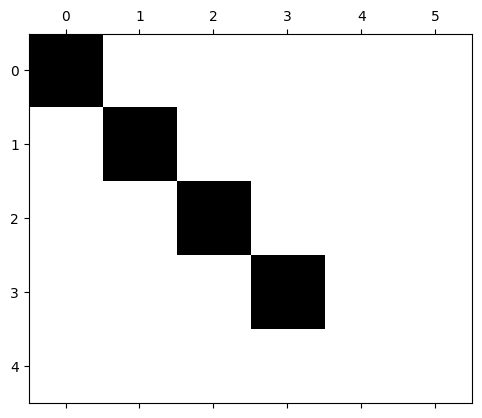

In [6]:
# This scipt computes the Smith normal form assuming inputs use Z_2 coefficients.
import smith

N1,U0,V1= smith.smith_form(B1)
N2,U1,V2= smith.smith_form(B2)


plt.spy(N1)
plt.show()

## Smith Normal Form for $\partial_1$
$N_1 = U_{0}\partial_1 V_1$.

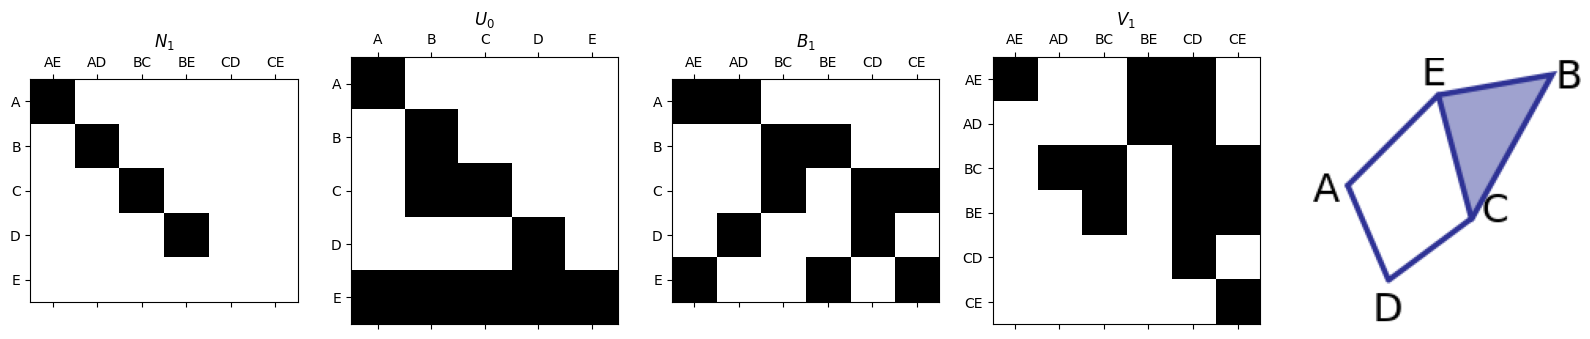

In [7]:
# This script is in the smith.py file, it's just for plotting.
smith.plotFirstSetOfMatrices(N1,U0,B1,V1,edge_list,vertex_list)

## Smith Normal Form for $\partial_2$
$N_2 = U_{1}\partial_2 V_2$.

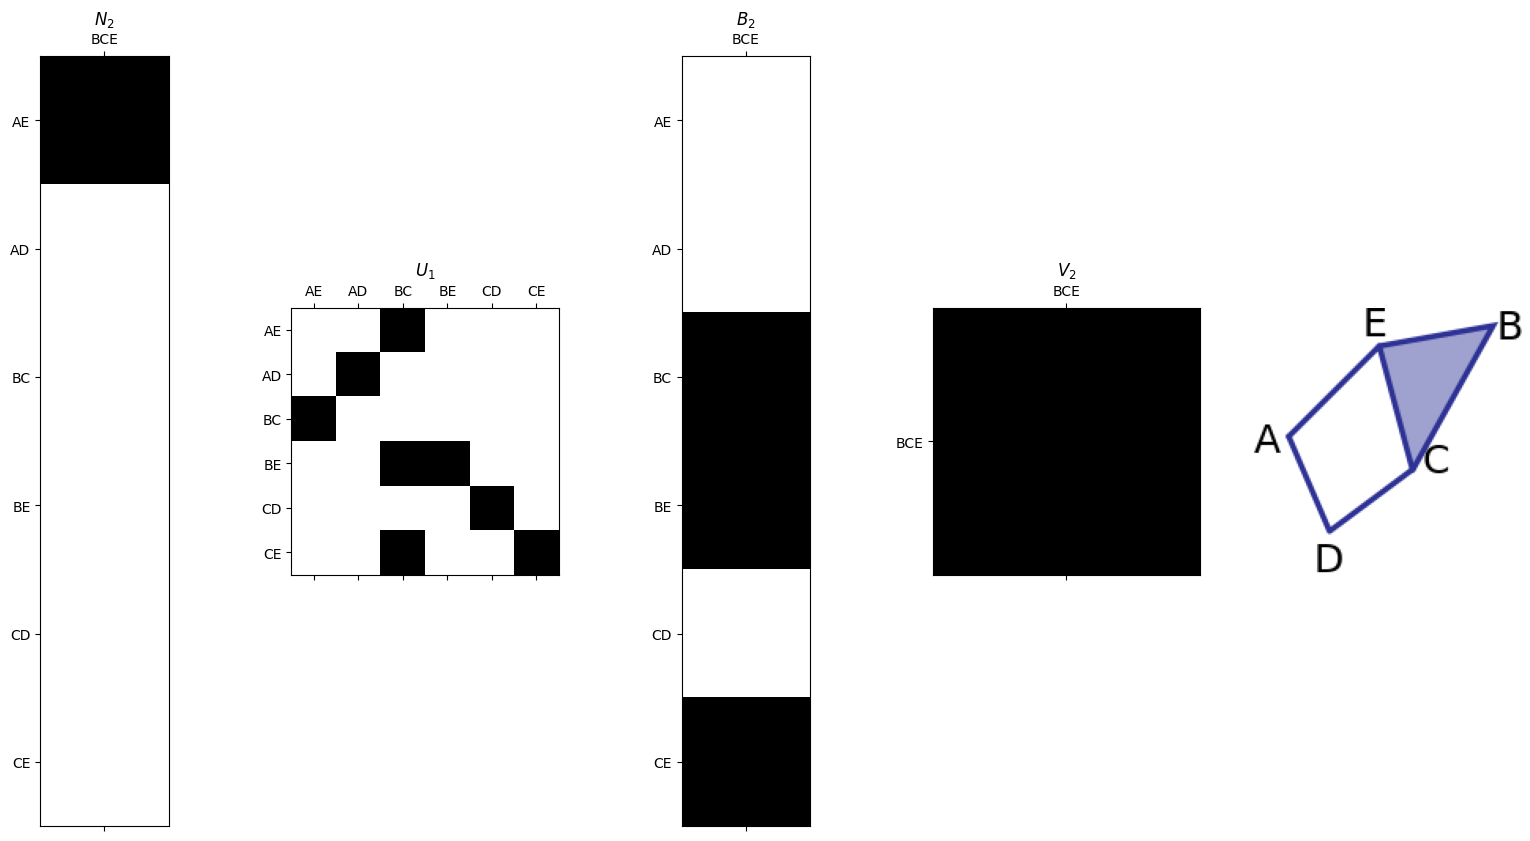

In [8]:
smith.plotSecondSetOfMatrices(N2,U1,B2,V2,edge_list,triangle_list)

## You do it: 
Now use these matrix outputs to calculate the betti numbers $\beta_0$, $\beta_1$, and $\beta_2$.
Specifically, use the image below and the fact that $\beta_p = z_p - b_p$.

![Image](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/BdyInSNF.png)


In [9]:
N2_pd = pd.DataFrame(N2, index = edge_list, columns = triangle_list)
N2_pd

BCE
AE    1
AD    0
BC    0
BE    0
CD    0
CE    0

In [10]:
N1_pd = pd.DataFrame(N1, index = vertex_list, columns = edge_list)
N1_pd

AE  AD  BC  BE  CD  CE
A   1   0   0   0   0   0
B   0   1   0   0   0   0
C   0   0   1   0   0   0
D   0   0   0   1   0   0
E   0   0   0   0   0   0

## Fill out this table to answer the previous question

$$0 \longrightarrow C_2(K) \longrightarrow C_1(K) \longrightarrow C_0(K) \longrightarrow 0$$

| | $c_p$ | $z_p$ | $b_p$ | $\beta_p = z_p - b_p$ (Betti number)|
| :--- | :--- | :--- | :--- | :--- |
|$p=0$ | | | |
|$p=1$ | | | |
|$p=2$ | | | |

### Solution commented out in this cell.... no peeking!


<!-- ![Solution](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_1-AnnotatedBdy.jpg) -->
<!-- 
| | $c_p$ | $z_p$ | $b_p$ | $\beta_p = z_p - b_p$|
| :--- | :--- | :--- | :--- | :--- |
|$p=0$ | 5 | (5) | 4 | 1 |
|$p=1$ | 6 | 2 | 1 | 1 |
|$p=2$ | 1 | 0 | (0) | 0 | -->

# Reading off the generators of homology

![Simplicial Complex Example 1](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_1.png)


## Generators for $Z_p(K)$


- Remember $Z_p(K)$ is the kernel of the boundary map $\partial_1: C_p(K) \to C_{p-1}(K)$.
- We can think of Smith Normal Form as giving a particularly nice basis for the domain and range to make finding the kernel and image easy. 
- The generators for $Z_1$ are the last $z_1$ columns of $V_1$. 


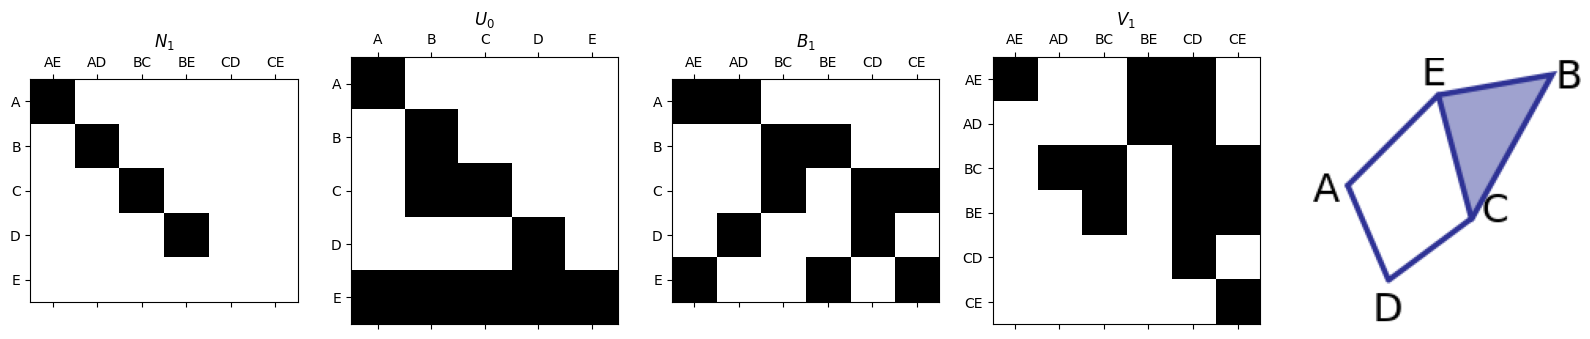

In [11]:
smith.plotFirstSetOfMatrices(N1,U0,B1,V1,edge_list,vertex_list)

## Generators for $Z_1(K)$ in this example



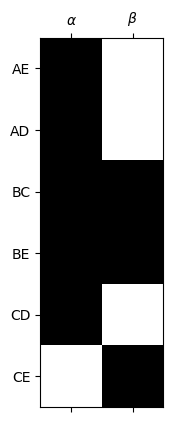

In [12]:
z1 = 2
plt.spy(V1[:,-z1:])
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels([r'$\alpha$',r'$\beta$'])
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(edge_list)
plt.show()

alpha = V1[:,-z1]
beta = V1[:,-1]

## Generators for $B_p(K)$

The generators for $B_p(K)$ are stored as the first $b_p$ columns of $U_p^{-1}$.

In this case, we think of the labels for the rows as the $p$-simplices

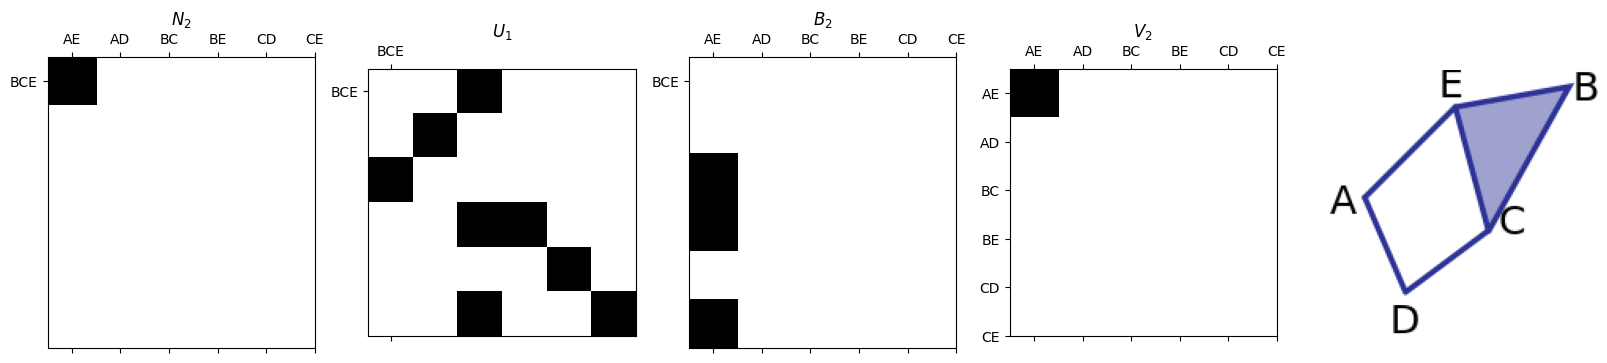

In [13]:
smith.plotSecondSetOfMatrices(N2,U1,B2,V2,triangle_list,edge_list)

## Generators for $B_1(K)$ in this example

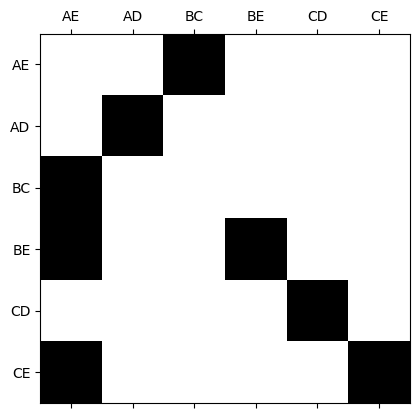

In [14]:
# Compute $U_1$ inverse
U1_inv = np.mod(np.linalg.inv(U1),2).astype(int)
plt.spy(U1_inv)
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5])
ax.set_yticks([0,1,2,3,4,5])
ax.set_xticklabels(edge_list)
ax.set_yticklabels(edge_list);
plt.show()

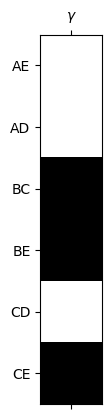

In [15]:
b1 = 1
plt.spy(U1_inv[:,:b1])
ax = plt.gca()
ax.set_xticks([0])
ax.set_xticklabels([r'$\gamma$'])
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(edge_list);
gamma = U1_inv[:,0]
plt.show()

## Computing generators of homology 

For now, brute force: 



In [16]:
print('Compute the equivalence class of alpha:')
print(edge_list)
print( 'alpha:', np.mod( alpha + 0 , 2) )
print( 'alpha + gamma:', np.mod( alpha + gamma ,2 ) )

print("\nNotice that neither element of the equivalence class is beta or 0 ")
print(beta)

Compute the equivalence class of alpha:
['AE', 'AD', 'BC', 'BE', 'CD', 'CE']
alpha: [1 1 1 1 1 0]
alpha + gamma: [1 1 0 0 1 1]

Notice that neither element of the equivalence class is beta or 0 
[0 0 1 1 0 1]


In [17]:
print('Compute the equivalence class of beta:')
print(edge_list)
print('beta:', np.mod( beta + 0 , 2) )
print('beta+gamma:', np.mod( beta + gamma ,2 ) )

print("Notice that 0 is an element of the equivalence class, so [beta] = [0]. ")


Compute the equivalence class of beta:
['AE', 'AD', 'BC', 'BE', 'CD', 'CE']
beta: [0 0 1 1 0 1]
beta+gamma: [0 0 0 0 0 0]
Notice that 0 is an element of the equivalence class, so [beta] = [0]. 


# If there's time.....

For the following example (the tetrahedron is empty):

![Simplicial Complex example 3](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_3.png)

- What are the boundary matrices $\partial_0$, $\partial_1$, and $\partial_2$?
- Use the `smith` package to get the smith normal form of each.
- Fill out the table below to determine the Betti numbers.
- Give representatives for each of the homology classes. 

$$0 \longrightarrow C_2(K) \longrightarrow C_1(K) \longrightarrow C_0(K) \longrightarrow 0$$

| | $c_p$ | $z_p$ | $b_p$ | $\beta_p = z_p - b_p$|
| :--- | :--- | :--- | :--- | :--- |
|$p=0$ |   |   |   |   |
|$p=1$ |   |   |   |   |
|$p=2$ |   |   |   |   |